<a href="https://colab.research.google.com/github/nhrishi/1.1.0-experimental_bin/blob/master/TradingIntel_v0_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import numpy as np
import pandas as pd
import pandas_ta as ta
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.activations import relu, tanh, sigmoid

from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import json as json

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

#pip install fyers_apiv3

In [55]:
pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=fab51b9e9decfd0a05c14712bd10ffd39ba12b949fba7dcb1ae8802f1b0a08cf
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [2]:
pip install fyers_apiv3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.8/101.8 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.8/171.8 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.9/101.9 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.2/82.2 kB 9.2 MB/s eta 0:00:00
  Attempting uninstall: websocket-client
    Found existing installation: websocket-client 1.8.0
    Uninstalling websocket-client-1.8.0:
      Successfully uninstalled websocket-client-1.8.0
  Attempting uninstall: aiohttp
    Found existing installation: aiohttp 3.9.5
    Uninstalling aiohttp-3.9.5:
      Successfully uninstalled aiohttp-3.9.5


In [78]:
from fyers_apiv3 import fyersModel

client_id = "Q9Y3IP8H5W-100"
#access_token = "eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJhcGkuZnllcnMuaW4iLCJpYXQiOjE3MTcwNzk5MzEsImV4cCI6MTcxNzExNTQ1MSwibmJmIjoxNzE3MDc5OTMxLCJhdWQiOlsieDowIiwieDoxIiwieDoyIiwiZDoxIiwiZDoyIiwieDoxIiwieDowIl0sInN1YiI6ImFjY2Vzc190b2tlbiIsImF0X2hhc2giOiJnQUFBQUFCbVdJOTdrQ19seDQzZEM4S1FhMGlRQ3pFNjg1Ti1rYlZiN3ROQ3E2QU1ubU95eU9kcUFaQms2ZzJNalhFQXFQWkpYeS1fMnJlSXhycWF4eWw4RklwcFNNc3BmclNhdHhMSHB6Z1p5MERIRV94Qk1Qaz0iLCJkaXNwbGF5X25hbWUiOiJIUklTSElLRVNIIERFRVBBSyBOQVNISUtLQVIiLCJvbXMiOiJLMSIsImhzbV9rZXkiOiIzMDI1Y2IzMjkxYWEzYTcyMzM3MWIyYzkxOGU4YTc5ZDFkZDk5ODlmMmI3NjcwY2ViZGZkNjQyNiIsImZ5X2lkIjoiWUgwMTc3NSIsImFwcFR5cGUiOjEwMCwicG9hX2ZsYWciOiJOIn0.6iCpNueqfkemVbnVBfC_N6vVbMoZM2mxiDCO9mnfCzA"
access_token = "eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJhcGkuZnllcnMuaW4iLCJpYXQiOjE3MTcyMjAzODEsImV4cCI6MTcxNzI4ODI0MSwibmJmIjoxNzE3MjIwMzgxLCJhdWQiOlsieDowIiwieDoxIiwieDoyIiwiZDoxIiwiZDoyIiwieDoxIiwieDowIl0sInN1YiI6ImFjY2Vzc190b2tlbiIsImF0X2hhc2giOiJnQUFBQUFCbVdyUWR2amNWcDBuWjVORGF1UHJHal9FRy1NODQ0U0RORWJ5b3ViUGhVWEoyamRhLXNKbkFMMjF3VEE5aWJCUDZPQzRQTkVmMGs1NmlSUU9yR0phME9ldC10YU8zMGxQVFVXV21BMkc3czlGOXZnST0iLCJkaXNwbGF5X25hbWUiOiJIUklTSElLRVNIIERFRVBBSyBOQVNISUtLQVIiLCJvbXMiOiJLMSIsImhzbV9rZXkiOiIzMDI1Y2IzMjkxYWEzYTcyMzM3MWIyYzkxOGU4YTc5ZDFkZDk5ODlmMmI3NjcwY2ViZGZkNjQyNiIsImZ5X2lkIjoiWUgwMTc3NSIsImFwcFR5cGUiOjEwMCwicG9hX2ZsYWciOiJOIn0.i0XMeuNysywDHYfM7IhX892O6GjznBWtBB-M0FrLMVU"
# Initialize the FyersModel instance with your client_id, access_token, and enable async mode
fyers = fyersModel.FyersModel(client_id=client_id, is_async=False, token=access_token, log_path="")

#yyyy-mm-dd
#Daily data Extraction
daily_data = {
    "symbol":"NSE:SBIN-EQ",
    "resolution":"D",
    "date_format":"1",
    "range_from":"2023-06-01",
    "range_to":"2024-05-29",
    "cont_flag":"1"
}

response = fyers.history(data=daily_data)
print(response)
daily_data_json = json.dumps(response)
daily_data_df = json.loads(daily_data_json)
print(daily_data_df['candles'])
pricing_daily_data = daily_data_df['candles']
daily_df = pd.DataFrame(pricing_daily_data)
daily_df.columns = ["epoch", "open", "high", "low", "close", "volume"]


# #hourly data Extraction
# hourly_data = {
#     "symbol":"NSE:SBIN-EQ",
#     "resolution":"60",
#     "date_format":"1",
#     "range_from":"2024-03-01",
#     "range_to":"2024-05-29",
#     "cont_flag":"1"
# }

# response = fyers.history(data=hourly_data)
# print(response)
# hourly_data_json = json.dumps(response)
# hourly_data_df = json.loads(hourly_data_json)
# print(hourly_data_df['candles'])
# pricing_hourly_data = hourly_data_df['candles']
# hourly_df = pd.DataFrame(pricing_hourly_data)
# hourly_df.columns = ["epoch", "open", "high", "low", "close", "volume"]


import datetime
daily_df['date'] = pd.to_datetime(daily_df['epoch'], unit='s').dt.strftime('%Y-%m-%d')
print(daily_df)

# hourly_df['date'] = pd.to_datetime(hourly_df['epoch'], unit='s').dt.strftime('%Y-%m-%d')
# print(hourly_df)


{'candles': [[1685577600, 581.8, 586.4, 581, 582.75, 17820226], [1685664000, 584.7, 588.9, 583, 587.2, 11323908], [1685923200, 588.5, 589.8, 586, 587.2, 12920507], [1686009600, 588, 588.9, 583, 585.35, 11199940], [1686096000, 588, 590.6, 586, 589.2, 11113781], [1686182400, 589.95, 593.95, 586.35, 588.5, 15971917], [1686268800, 588, 589.1, 576.75, 578.7, 18870272], [1686528000, 580, 581.5, 577.7, 578.65, 8786066], [1686614400, 579.45, 581.4, 574.25, 576.4, 12612098], [1686700800, 577, 578.55, 575.25, 576.55, 8948696], [1686787200, 576, 576.7, 565.25, 566.5, 17934877], [1686873600, 568.75, 574.7, 567.05, 571.25, 12660226], [1687132800, 571.25, 572.75, 565.9, 568.85, 17903691], [1687219200, 568.85, 569.45, 562.55, 567.4, 14549152], [1687305600, 567.4, 569.5, 565.65, 566.35, 14946871], [1687392000, 566.35, 569, 561.05, 562.95, 14979063], [1687478400, 562, 562.1, 553.8, 554.6, 12215712], [1687737600, 556, 558.5, 554.5, 557.05, 8360264], [1687824000, 558.25, 567.95, 555.65, 566.1, 10694768],

In [ ]:
#hourly_df.set_index('date', inplace=True)
#daily_df.set_index('date', inplace=True)

In [79]:
# Moving Average 20
#daily_df['MA_20'] = daily_df['close'].rolling(window=20).mean()
#daily_df.dropna(inplace=True)
#print(daily_df)

daily_df['DAILY_RSI']=ta.rsi(daily_df.close, length=15)
daily_df['DAILY_EMA5']=ta.ema(daily_df.close, length=5)
daily_df['DAILY_EMA12']=ta.ema(daily_df.close, length=12)
daily_df['DAILY_EMA13']=ta.ema(daily_df.close, length=13)
daily_df['DAILY_EMA26']=ta.ema(daily_df.close, length=26)
daily_df['DAILY_EMA50']=ta.ema(daily_df.close, length=50)
# daily_df['MACD_TA'], daily_df['histogram'], daily_df['signal']=ta.macd(daily_df.close, fast=12, slow=26, signal=9)


####### Daily MACD calculations ######
# # Calculate the 5-period EMA Daily
# daily_df['DAILY_EMA5'] = daily_df['close'].ewm(span=5, adjust=False).mean()

# # Calculate the 13-period EMA Daily
# daily_df['DAILY_EMA13'] = daily_df['close'].ewm(span=13, adjust=False).mean()

# # Calculate the 12-period EMA Daily
# daily_df['DAILY_EMA12'] = daily_df['close'].ewm(span=12, adjust=False).mean()

# # Calculate the 26-period EMA Daily
# daily_df['DAILY_EMA26'] = daily_df['close'].ewm(span=26, adjust=False).mean()

# # Calculate the 50-period EMA Daily
# daily_df['DAILY_EMA50'] = daily_df['close'].ewm(span=50, adjust=False).mean()

# # Calculate the 100-period EMA Daily
# daily_df['DAILY_EMA100'] = daily_df['close'].ewm(span=100, adjust=False).mean()

# Calculate MACD (the difference between 12-period EMA and 26-period EMA)
daily_df['DAILY_MACD'] = daily_df['DAILY_EMA12'] - daily_df['DAILY_EMA26']

# Calculate the 9-period EMA of MACD (Signal Line)
daily_df['DAILY_SIGNAL'] = daily_df['DAILY_MACD'].ewm(span=9, adjust=False).mean()

## Target calculation
daily_df['Target'] = daily_df['close']-daily_df.open
daily_df['Target'] = daily_df['Target'].shift(-1)

daily_df['TargetClass'] = [1 if daily_df.Target[i]>0 else 0 for i in range(len(daily_df))]

daily_df['TargetNextClose'] = daily_df['close'].shift(-1)

# ####### Daily RSI calculations ######

# delta = daily_df['close'].diff()
# gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
# loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
# RS = gain / loss
# daily_df['DAILY_RSI'] = 100 - (100 / (1 + RS))


#### Drop rows with NaN values created by indicators calculation

daily_df.dropna(inplace=True)
# hourly_df.dropna(inplace=True)
# daily_df.reset_index(inplace = True)

print(daily_df.shape)
# print(hourly_df.shape)

(197, 18)


In [64]:
# help(ta.macd)

Help on function macd in module pandas_ta.momentum.macd:

macd(close, fast=None, slow=None, signal=None, talib=None, offset=None, **kwargs)
    Moving Average Convergence Divergence (MACD)
    
    The MACD is a popular indicator to that is used to identify a security's trend.
    While APO and MACD are the same calculation, MACD also returns two more series
    called Signal and Histogram. The Signal is an EMA of MACD and the Histogram is
    the difference of MACD and Signal.
    
    Sources:
        https://www.tradingview.com/wiki/MACD_(Moving_Average_Convergence/Divergence)
        AS Mode: https://tr.tradingview.com/script/YFlKXHnP/
    
    Calculation:
        Default Inputs:
            fast=12, slow=26, signal=9
        EMA = Exponential Moving Average
        MACD = EMA(close, fast) - EMA(close, slow)
        Signal = EMA(MACD, signal)
        Histogram = MACD - Signal
    
        if asmode:
            MACD = MACD - Signal
            Signal = EMA(MACD, signal)
          

In [80]:
# print(daily_df.shape)
# print(len(daily_df))
print(daily_df)

# print(hourly_df.shape)

          epoch    open    high     low   close    volume        date  \
49   1691625600  573.75  577.60  570.10  573.65  27325801  2023-08-10   
50   1691712000  575.45  579.00  572.00  574.15  18221179  2023-08-11   
51   1691971200  572.95  573.00  558.60  560.80  28084093  2023-08-14   
52   1692144000  558.80  566.40  554.00  565.35  15725767  2023-08-16   
53   1692230400  565.75  573.15  564.00  572.15  27910162  2023-08-17   
..          ...     ...     ...     ...     ...       ...         ...   
241  1716336000  826.55  826.65  813.55  818.75  19239277  2024-05-22   
242  1716422400  824.70  835.50  822.00  832.10  17497488  2024-05-23   
243  1716508800  830.00  841.25  827.00  828.60  12252075  2024-05-24   
244  1716768000  832.60  839.40  823.00  833.70  12295193  2024-05-27   
245  1716854400  835.70  840.70  823.30  831.15  13818893  2024-05-28   

     DAILY_RSI  DAILY_EMA5  DAILY_EMA12  DAILY_EMA13  DAILY_EMA26  \
49   38.692269  576.866776   586.708786   587.495199  

In [52]:
# import pandas as pd
# import numpy as np

# def calculate_adx(df, n=14):
#     df['H-L'] = df['high'] - df['low']
#     df['H-C'] = np.abs(df['high'] - df['close'].shift(1))
#     df['L-C'] = np.abs(df['low'] - df['close'].shift(1))
#     df['TR'] = df[['H-L', 'H-C', 'L-C']].max(axis=1)

#     df['+DM'] = np.where((df['high'] - df['high'].shift(1)) > (df['low'].shift(1) - df['low']),
#                          df['high'] - df['high'].shift(1), 0)
#     df['+DM'] = np.where(df['+DM'] < 0, 0, df['+DM'])

#     df['-DM'] = np.where((df['low'].shift(1) - df['low']) > (df['high'] - df['high'].shift(1)),
#                          df['low'].shift(1) - df['low'], 0)
#     df['-DM'] = np.where(df['-DM'] < 0, 0, df['-DM'])

#     df['ATR'] = df['TR'].rolling(window=n).mean()
#     df['+DI'] = 100 * (df['+DM'].rolling(window=n).mean() / df['ATR'])
#     df['-DI'] = 100 * (df['-DM'].rolling(window=n).mean() / df['ATR'])

#     df['DX'] = 100 * np.abs((df['+DI'] - df['-DI']) / (df['+DI'] + df['-DI']))
#     df['ADX'] = df['DX'].rolling(window=n).mean()

#     return df[['+DI', '-DI', 'ADX']]
#     # return df

# # Example usage
# # data = {
# #     'High': [50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63],
# #     'Low': [45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58],
# #     'Close': [48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]
# # }
# # df = pd.DataFrame(data)
# adx_df = calculate_adx(daily_df, len(daily_df))
# new_daily_df = pd.concat([daily_df, adx_df], axis=1)
# new_daily_df.dropna(inplace=True)

# print(new_daily_df)



Empty DataFrame
Columns: [epoch, open, high, low, close, volume, date, DAILY_EMA5, DAILY_EMA13, DAILY_EMA12, DAILY_EMA26, DAILY_EMA50, DAILY_EMA100, DAILY_MACD, DAILY_SIGNAL, DAILY_RSI, H-L, H-C, L-C, TR, +DM, -DM, ATR, +DI, -DI, DX, ADX, +DI, -DI, ADX]
Index: []

[0 rows x 30 columns]


In [81]:
# Normalize features
scaler = MinMaxScaler()
#scaled_data = scaler.fit_transform(combined_df[['close', 'DAILY_MACD', 'DAILY_RSI', 'DAILY_SIGNAL', 'volume', 'HOURLY_RSI_max', 'HOURLY_RSI_min', 'DAILY_EMA5', 'DAILY_EMA13', 'DAILY_EMA26', 'HOURLY_EMA5_mean', 'HOURLY_EMA13_mean', 'HOURLY_EMA26_mean' ]])
scaled_data = scaler.fit_transform(daily_df[['close', 'DAILY_MACD', 'DAILY_RSI', 'DAILY_SIGNAL', 'volume', 'DAILY_EMA5', 'DAILY_EMA13', 'DAILY_EMA26', 'DAILY_EMA50', 'Target', 'TargetClass', 'TargetNextClose' ]])

#print(scaled_data)

In [36]:
print(scaled_data.shape)

(234, 9)


In [96]:
# Create sequences for LSTM model
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        labels.append(data[i + seq_length, 0])  # Assuming 'Close' is the first column
    return np.array(sequences), np.array(labels)


# If the input data is not a 2D array, reshape it
if len(scaled_data.shape) != 2:
    scaled_data = scaled_data.reshape(-1, 1)

SEQ_LENGTH = 10  # 60 days sequence
X, y = create_sequences(scaled_data, SEQ_LENGTH)

# Split into training and test sets
split = int(0.6 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [83]:
#print(X)
#print("------")
#print(y)
# print(len(scaled_data))
# print(scaled_data.shape)
# print(len(combined_df))
# print(X_train.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(113, 8, 12)
(113,)
(76, 8, 12)
(76,)


In [ ]:
# if len(X_train.shape) == 3:
#     X_train = np.expand_dims(X_train, axis=2)

In [99]:
model = Sequential([
    LSTM(150, activation='tanh', return_sequences=True, input_shape=(SEQ_LENGTH, X_train.shape[2])),
    Dropout(0.2),
    LSTM(150, activation='tanh',return_sequences=True),
    Dropout(0.2),
    LSTM(150, activation='tanh'),
    Dropout(0.2),
    Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mean_squared_error')
# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/50
4/4 [==============================] - 7s 457ms/step - loss: 0.0218 - val_loss: 0.1280
Epoch 2/50
4/4 [==============================] - 0s 64ms/step - loss: 0.0057 - val_loss: 0.2301
Epoch 3/50
4/4 [==============================] - 0s 72ms/step - loss: 0.0055 - val_loss: 0.0678
Epoch 4/50
4/4 [==============================] - 0s 69ms/step - loss: 0.0045 - val_loss: 0.0996
Epoch 5/50
4/4 [==============================] - 0s 67ms/step - loss: 0.0038 - val_loss: 0.1369
Epoch 6/50
4/4 [==============================] - 0s 70ms/step - loss: 0.0039 - val_loss: 0.0595
Epoch 7/50
4/4 [==============================] - 0s 73ms/step - loss: 0.0032 - val_loss: 0.0905
Epoch 8/50
4/4 [==============================] - 0s 70ms/step - loss: 0.0024 - val_loss: 0.0605
Epoch 9/50
4/4 [==============================] - 0s 69ms/step - loss: 0.0023 - val_loss: 0.0511
Epoch 10/50
4/4 [==============================] - 0s 90ms/step - loss: 0.0022 - val_loss: 0.0489
Epoch 11/50
4/4 [===========

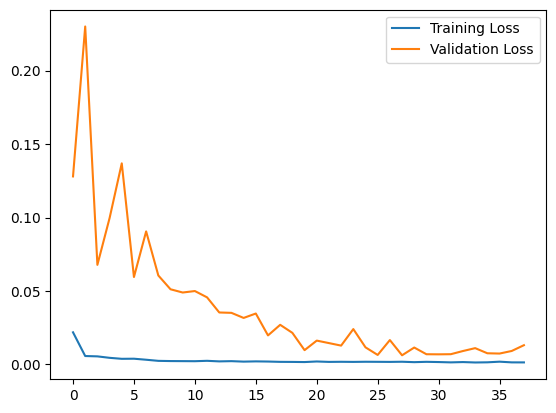

3/3 [==============================] - 1s 16ms/step


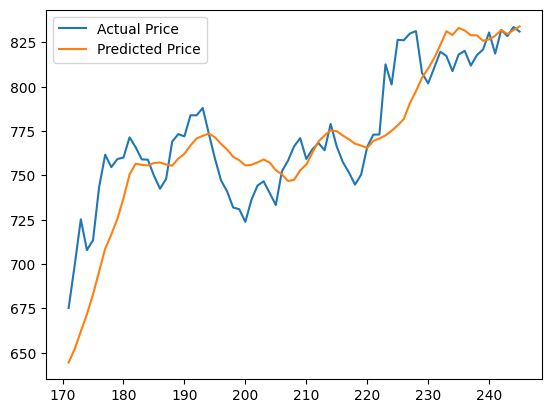

[644.48367446 652.14291921 661.99620157 671.67135184 682.90829379
 695.78795073 708.71426824 716.68388562 725.53394452 737.10708005
 750.54093052 756.6955793  755.97771922 755.63558732 757.01894785
 757.29118716 756.17957037 755.47750021 759.53854992 762.18430041
 766.94986396 770.83486639 772.32790188 773.63391917 771.57707779
 767.84505298 764.66632453 760.52147207 758.58213226 755.62606894
 755.99532053 757.35299681 759.01498781 757.22221736 752.97274818
 750.57462934 746.85801849 747.5168031  752.92442147 756.09089736
 762.8279103  769.17246526 772.56539996 775.4161801  774.9436447
 772.50393208 770.35710186 767.90395756 766.80426865 765.55095276
 769.44801977 770.8346955  772.57394429 775.20033334 778.23464559
 781.78014777 790.78046718 797.56230366 805.18018532 810.34191509
 816.25530629 823.57377769 831.33740847 829.21204159 833.22700321
 831.73887216 829.10096536 829.0191278  825.97186235 826.7004541
 828.79249811 832.00196904 829.75988668 831.9865209  834.03011857]


In [100]:
# Plot training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# Make predictions
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(np.concatenate([predicted_prices, np.zeros((predicted_prices.shape[0], X_test.shape[2] - 1))], axis=1))[:, 0]

# Plot predicted vs actual prices
plt.plot(daily_df.index[-len(y_test):], scaler.inverse_transform(np.concatenate([y_test.reshape(-1, 1), np.zeros((y_test.shape[0], X_test.shape[2] - 1))], axis=1))[:, 0], label='Actual Price')
plt.plot(daily_df.index[-len(y_test):], predicted_prices, label='Predicted Price')
plt.legend()
plt.show()

print(predicted_prices)
